In [24]:
import prody
import pandas as pd
from sequence_mutations import mutate_sequence, get_smiles_from_pdb_cid
from rdkit import Chem

In [66]:
prot = prody.parsePDB("2pio")

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> Downloading PDB files via FTP failed, trying HTTP.
@> 2pio downloaded (2pio.pdb.gz)
@> PDB download via HTTP completed (1 downloaded, 0 failed).
@> 2212 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [67]:
list(set(prot.getChids()))

['A']

In [68]:
list(set(prot.select("not protein and not water").getResnames()))

['SO4', 'DHT', '2MI']

In [73]:
ligand_resname = "DHT"
asite_prot = prot.select(f"protein and chid A within 3.5 of resname {ligand_resname}")
asite_chids = list(set(asite_prot.getChids()))
asite_res = list(set(asite_prot.getResnums()))

In [74]:
asite_chids, asite_res

(['A'], [704, 705, 877, 752])

In [75]:
ligand_smiles = get_smiles_from_pdb_cid(ligand_resname)
ligand_smiles

'C[C]12CC[CH]3[CH](CC[CH]4CC(=O)CC[C]34C)[CH]1CC[CH]2O'

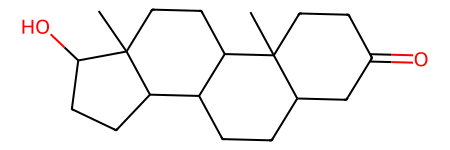

In [76]:
Chem.MolFromSmiles(ligand_smiles)

Get the wild type sequence

In [77]:
orig_seq = mutate_sequence(prot, asite_res)
orig_seq

'PIFLNVLEAIEPGVVCAGHDNNQPDSFAALLSSLNELGERQLVHVVKWAKALPGFRNLHVDDQMAVIQYSWMGLMVFAMGWRSFTNVNSRMLYFAPDLVFNEYRMHKSRMYSQCVRMRHLSQEFGWLQITPQEFLCMKALLLFSIIPVDGLKNQKFFDELRMNYIKELDRIIACKRKNPTSCSRRFYQLTKLLDSVQPIARELHQFTFDLLIKSHMVSVDFPEMMAEIISVQVPKILSGKVKPIYFHT'

Get the sequence with the active site residues mutated to **GLY**. 

In [78]:
gly_seq = mutate_sequence(prot, asite_res, 'G')
gly_seq

'PIFLNVLEAIEPGVVCAGHDNNQPDSFAALLSSGGELGERQLVHVVKWAKALPGFRNLHVDDQMAVIQYSWMGLMVFAMGWGSFTNVNSRMLYFAPDLVFNEYRMHKSRMYSQCVRMRHLSQEFGWLQITPQEFLCMKALLLFSIIPVDGLKNQKFFDELRMNYIKELDRIIACKRKNPTSCSRRFYQLTKLLDSVQPIARELHQFGFDLLIKSHMVSVDFPEMMAEIISVQVPKILSGKVKPIYFHT'

Get the sequence with the active site residues mutated to **PHE**.

In [79]:
phe_seq = mutate_sequence(prot, asite_res, 'F')
phe_seq

'PIFLNVLEAIEPGVVCAGHDNNQPDSFAALLSSFFELGERQLVHVVKWAKALPGFRNLHVDDQMAVIQYSWMGLMVFAMGWFSFTNVNSRMLYFAPDLVFNEYRMHKSRMYSQCVRMRHLSQEFGWLQITPQEFLCMKALLLFSIIPVDGLKNQKFFDELRMNYIKELDRIIACKRKNPTSCSRRFYQLTKLLDSVQPIARELHQFFFDLLIKSHMVSVDFPEMMAEIISVQVPKILSGKVKPIYFHT'

Get the sequence with Miyata replacements

In [80]:
miy_seq = mutate_sequence(prot, asite_res, 'miyata')
miy_seq

'PIFLNVLEAIEPGVVCAGHDNNQPDSFAALLSSDWELGERQLVHVVKWAKALPGFRNLHVDDQMAVIQYSWMGLMVFAMGWGSFTNVNSRMLYFAPDLVFNEYRMHKSRMYSQCVRMRHLSQEFGWLQITPQEFLCMKALLLFSIIPVDGLKNQKFFDELRMNYIKELDRIIACKRKNPTSCSRRFYQLTKLLDSVQPIARELHQFWFDLLIKSHMVSVDFPEMMAEIISVQVPKILSGKVKPIYFHT'

In [81]:
[len(x) for x in [orig_seq, gly_seq, phe_seq, miy_seq]]

[248, 248, 248, 248]